#Time Series Forecasting

Import all required libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime as dt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

Upload CSV file in Colab book

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Weather_data.csv to Weather_data.csv


Reading Data from Weather_data.csv and data instances named df

In [6]:
df=pd.read_csv("Weather_data.csv",skipinitialspace=True)
df

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98908,20161130-12:30,Mist,17.0,0,0,NaN,78.0,NaN,1015.0,0,0,21.0,0,0,1.5,0.0,North,NaN,NaN,0.0
98909,20161130-13:00,Mist,16.0,0,0,NaN,83.0,NaN,1015.0,0,0,19.0,0,0,1.2,0.0,North,NaN,NaN,0.0
98910,20161130-15:00,Patches of Fog,16.0,1,0,NaN,90.0,NaN,1016.0,0,0,17.0,0,0,1.0,NaN,NaN,NaN,NaN,0.0
98911,20161130-18:00,Patches of Fog,14.0,1,0,NaN,96.0,NaN,1017.0,0,0,15.0,0,0,1.0,NaN,NaN,NaN,NaN,0.0


Check shape of the data

In [7]:
df.shape

(98913, 20)

To get information about data like datatype of values, is that row is null or not etc

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datetime_utc  98913 non-null  object 
 1   _conds        98845 non-null  object 
 2   _dewptm       98294 non-null  float64
 3   _fog          98913 non-null  int64  
 4   _hail         98913 non-null  int64  
 5   _heatindexm   29111 non-null  float64
 6   _hum          98160 non-null  float64
 7   _precipm      0 non-null      float64
 8   _pressurem    98682 non-null  float64
 9   _rain         98913 non-null  int64  
 10  _snow         98913 non-null  int64  
 11  _tempm        98244 non-null  float64
 12  _thunder      98913 non-null  int64  
 13  _tornado      98913 non-null  int64  
 14  _vism         94497 non-null  float64
 15  _wdird        84533 non-null  float64
 16  _wdire        84533 non-null  object 
 17  _wgustm       1063 non-null   float64
 18  _windchillm   573 non-null

Ckeck null values present in dataset

In [9]:
df.isnull().sum()

datetime_utc        0
_conds             68
_dewptm           619
_fog                0
_hail               0
_heatindexm     69802
_hum              753
_precipm        98913
_pressurem        231
_rain               0
_snow               0
_tempm            669
_thunder            0
_tornado            0
_vism            4416
_wdird          14380
_wdire          14380
_wgustm         97850
_windchillm     98340
_wspdm           2353
dtype: int64

Remove null rows and columns values with the help of dropna

In [11]:
df = df.dropna(axis = 'columns', how = 'all')
df

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98908,20161130-12:30,Mist,17.0,0,0,NaN,78.0,1015.0,0,0,21.0,0,0,1.5,0.0,North,NaN,NaN,0.0
98909,20161130-13:00,Mist,16.0,0,0,NaN,83.0,1015.0,0,0,19.0,0,0,1.2,0.0,North,NaN,NaN,0.0
98910,20161130-15:00,Patches of Fog,16.0,1,0,NaN,90.0,1016.0,0,0,17.0,0,0,1.0,NaN,NaN,NaN,NaN,0.0
98911,20161130-18:00,Patches of Fog,14.0,1,0,NaN,96.0,1017.0,0,0,15.0,0,0,1.0,NaN,NaN,NaN,NaN,0.0


Define the shape of updated data

In [12]:
df.shape

(98913, 19)

Remove half counted values from dataset

In [13]:
half_count = len(df)/2
df = df.dropna(thresh=half_count,axis=1)
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,7.4
1,19961101-12:00,Smoke,10.0,0,0,32.0,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN
2,19961101-13:00,Smoke,11.0,0,0,44.0,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN
3,19961101-14:00,Smoke,10.0,0,0,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN
4,19961101-16:00,Smoke,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,0.0


Check shape of updated data

In [14]:
df.shape

(98913, 16)

Ckeck null present in updated dataset

In [15]:
df.isnull().sum()

datetime_utc        0
_conds             68
_dewptm           619
_fog                0
_hail               0
_hum              753
_pressurem        231
_rain               0
_snow               0
_tempm            669
_thunder            0
_tornado            0
_vism            4416
_wdird          14380
_wdire          14380
_wspdm           2353
dtype: int64

Create datatime column

In [16]:
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])
df = df.set_index('datetime_utc')
df.head()

,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm
datetime_utc,,,,,,,,,,,,,,,
1996-11-01 11:00:00,Smoke,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,7.4
1996-11-01 12:00:00,Smoke,10.0,0,0,32.0,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN
1996-11-01 13:00:00,Smoke,11.0,0,0,44.0,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN
1996-11-01 14:00:00,Smoke,10.0,0,0,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN
1996-11-01 16:00:00,Smoke,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,0.0


Change columns names to prevent data from messed up eg. removing underscore("_")

In [17]:
new_cols = [x.replace('_','') for x in df.columns]
df.columns = new_cols
df.columns

Index(['conds', 'dewptm', 'fog', 'hail', 'hum', 'pressurem', 'rain', 'snow',
       'tempm', 'thunder', 'tornado', 'vism', 'wdird', 'wdire', 'wspdm'],
      dtype='object')

We used ffill to fill the missing value in the dataframe, 'ffill' stands for 'forward fill' and will propagate last valid observation forward and check the null in recent updated data.

In [18]:
df.fillna(method='ffill',inplace=True)
df.isnull().sum()

conds        0
dewptm       0
fog          0
hail         0
hum          0
pressurem    0
rain         0
snow         0
tempm        0
thunder      0
tornado      0
vism         0
wdird        0
wdire        0
wspdm        0
dtype: int64

In [19]:
df

,conds,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wdire,wspdm
datetime_utc,,,,,,,,,,,,,,,
1996-11-01 11:00:00,Smoke,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,7.4
1996-11-01 12:00:00,Smoke,10.0,0,0,32.0,-9999.0,0,0,28.0,0,0,5.0,0.0,North,7.4
1996-11-01 13:00:00,Smoke,11.0,0,0,44.0,-9999.0,0,0,24.0,0,0,5.0,0.0,North,7.4
1996-11-01 14:00:00,Smoke,10.0,0,0,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,North,7.4
1996-11-01 16:00:00,Smoke,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-11-30 12:30:00,Mist,17.0,0,0,78.0,1015.0,0,0,21.0,0,0,1.5,0.0,North,0.0
2016-11-30 13:00:00,Mist,16.0,0,0,83.0,1015.0,0,0,19.0,0,0,1.2,0.0,North,0.0
2016-11-30 15:00:00,Patches of Fog,16.0,1,0,90.0,1016.0,0,0,17.0,0,0,1.0,0.0,North,0.0


This code snippet returns object containing counts of unique values.

In [20]:
df["conds"].value_counts()

Haze                             46924
Smoke                            20338
Mist                              9012
Clear                             3129
Widespread Dust                   2836
Fog                               2541
Scattered Clouds                  2197
Partly Cloudy                     2064
Shallow Fog                       1859
Mostly Cloudy                     1520
Light Rain                        1297
Partial Fog                        966
Patches of Fog                     820
Thunderstorms and Rain             471
Light Drizzle                      410
Heavy Fog                          407
Rain                               394
Unknown                            378
Blowing Sand                       358
Overcast                           313
Thunderstorm                       190
Light Thunderstorms and Rain       170
Drizzle                            111
Light Thunderstorm                  63
Light Fog                           52
Heavy Rain               

Check corelation between columns present in updated data.

In [21]:
le=LabelEncoder()
columns=(['conds','wdire'])
for col in columns:
    df[col] = le.fit_transform(df[col])

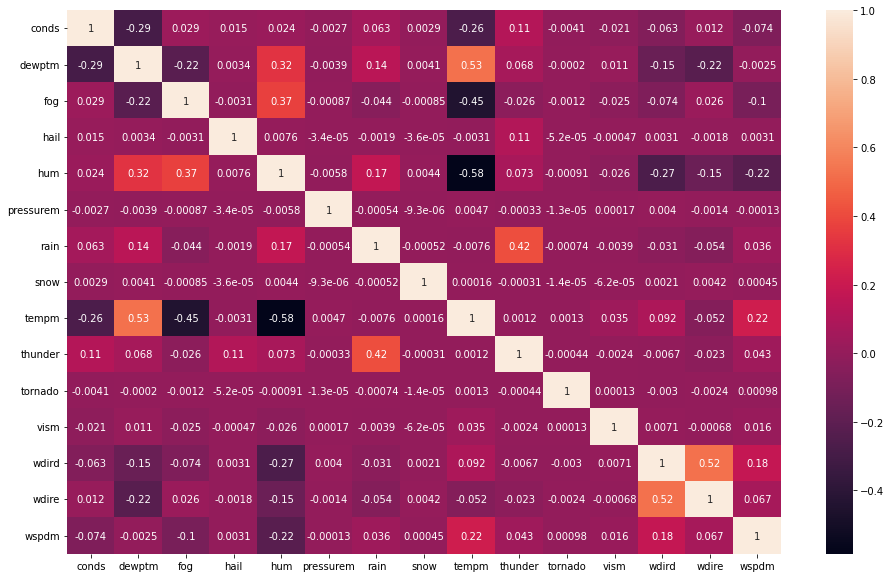

In [22]:
correlation = df.corr() 
fig, ax = plt.subplots(figsize=(16,10)) 
ax = sns.heatmap(correlation ,annot = True)

Important featured releted to target column

In [23]:
correlation.sort_values(['tempm'], ascending=False, inplace=True)
correlation.tempm

tempm        1.000000
dewptm       0.526783
wspdm        0.220101
wdird        0.091767
vism         0.034727
pressurem    0.004704
tornado      0.001293
thunder      0.001229
snow         0.000163
hail        -0.003055
rain        -0.007564
wdire       -0.052428
conds       -0.263406
fog         -0.447231
hum         -0.584771
Name: tempm, dtype: float64

We have to specify rows and columns by their integer index.

In [24]:
X=df.iloc[:,[0,1,2,3,4,5,6,7,9,10,11,12,13,14]].values
Y=df.iloc[:,8].values
X

array([[ 31. ,   9. ,   0. , ..., 280. ,  16. ,   7.4],
       [ 31. ,  10. ,   0. , ...,   0. ,   7. ,   7.4],
       [ 31. ,  11. ,   0. , ...,   0. ,   7. ,   7.4],
       ...,
       [ 25. ,  16. ,   1. , ...,   0. ,   7. ,   0. ],
       [ 25. ,  14. ,   1. , ...,   0. ,   7. ,   0. ],
       [ 20. ,  13. ,   0. , ...,   0. ,   7. ,   0. ]])

In [25]:
Y

array([30., 28., 24., ..., 17., 15., 14.])

Create Regression with using model LinearRegression

In [26]:
lr = LinearRegression()
lr.fit(X,Y)

LinearRegression()

Check model accuracy

In [27]:
lr.score(X,Y)

0.9161650272559051

In [28]:
y_pred = lr.predict(X)
y_pred

array([28.22212777, 27.93220006, 25.19592827, ..., 17.48222598,
       13.69848348, 11.25030855])

Adjustred R^2

In [29]:
mean_squared_error(Y,y_pred)
rmse = sqrt(mean_squared_error(Y, y_pred))
r2 = r2_score(Y, y_pred)
adj_r2 = 1 - float(len(Y)-1)/(len(Y)-len(lr.coef_)-1)*(1 - r2)
rmse, r2, adj_r2, lr.coef_, lr.intercept_

(2.452498171641229,
 0.9161650272559051,
 0.9161531595779094,
 array([-5.20544382e-03,  9.66242675e-01,  1.81650226e+00,  9.63229498e-01,
        -3.08542872e-01,  7.99966997e-08,  1.45545862e+00,  1.96297643e+00,
        -1.71100572e-01,  1.20079822e+00,  1.45195738e-03, -1.66866199e-03,
         1.99778552e-02,  2.63178138e-02]),
 27.963457259194897)

Temperature frequency

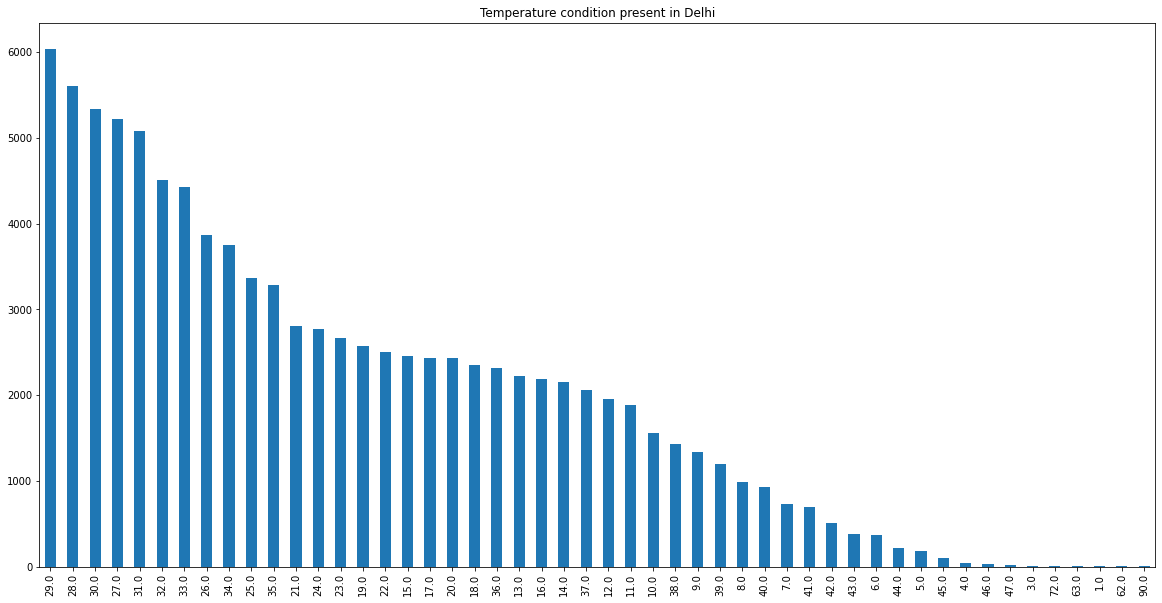

In [31]:
plt.figure(figsize=(20, 10));
df.tempm.value_counts().head(50).plot(kind='bar');
plt.title("Temperature condition present in Delhi")
plt.plot();